In [2]:
%matplotlib notebook

In [3]:
import os
import pandas as pd
import numpy as np
from scipy import stats


In [4]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
#Open the second encoded sf police data
second_sf_police = "./data/second_encoded_sf_police_data.csv"

second_encoded_sf_police_df = pd.read_csv(second_sf_police)
second_encoded_sf_police_df.head()

#data labeling

# incident_category: theft(1), vandalism(2), vehicle-related-crime(3), assault(0)
# incident_day_of_week: Mon(1), Tue(5), Wed(6), Thu(4), Fri(0), Sat(2), Sun(3)
# police_district: southern(8), northern(4), central(1), mission(3), bayview(0), ingleside(2), 
# taraval(9), richmond(7), tenderloin(10), park(6), out of sf(5)


,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
0,0,5,6,1,0,-122.396010,37.747262
1,0,4,9,22,0,-122.385000,37.755520
2,0,2,9,21,0,-122.394589,37.752427
3,0,4,3,17,8,-122.412447,37.775634
4,0,4,4,22,2,-122.417108,37.712256


In [6]:
second_encoded_sf_police_df.shape

(761482, 7)

In [7]:
second_encoded_sf_police_df.dtypes

incident_category         int64
incident_day_of_week      int64
incident_month            int64
incident_time             int64
police_district           int64
longitude               float64
latitude                float64
dtype: object

In [8]:
second_encoded_sf_police_df['incident_category'].value_counts()

1    267143
0    209357
3    149786
2    135196
Name: incident_category, dtype: int64

In [9]:
corrMatrix = second_encoded_sf_police_df.corr()

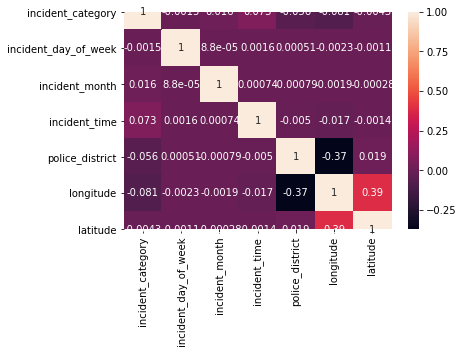

In [10]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [11]:
second_encoded_sf_police_df.describe()

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
count,761482.000000,761482.000000,761482.000000,761482.000000,761482.000000,761482.000000,761482.000000
mean,1.296016,2.931452,6.326990,13.700178,4.526875,-122.424199,37.768441
std,1.073157,2.003610,3.467367,6.726921,3.221410,0.028940,0.300338
min,0.000000,0.000000,1.000000,0.000000,0.000000,-122.513642,37.707879
25%,0.000000,1.000000,3.000000,9.000000,2.000000,-122.435066,37.750505
50%,1.000000,3.000000,6.000000,15.000000,4.000000,-122.418120,37.774129
75%,2.000000,5.000000,9.000000,19.000000,8.000000,-122.406775,37.785008
max,3.000000,6.000000,12.000000,23.000000,10.000000,-120.500000,90.000000


In [13]:
features_names = ['incident_day_of_week', 'incident_month', 'incident_time', 'police_district', 'longitude', 'latitude']
X = second_encoded_sf_police_df[features_names]
y = second_encoded_sf_police_df['incident_category']
X

,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
0,5,6,1,0,-122.396010,37.747262
1,4,9,22,0,-122.385000,37.755520
2,2,9,21,0,-122.394589,37.752427
3,4,3,17,8,-122.412447,37.775634
4,4,4,22,2,-122.417108,37.712256
...,...,...,...,...,...,...
761477,1,1,0,0,-122.383638,37.736605
761478,1,1,0,8,-122.375593,37.824524
761479,1,1,0,1,-122.405221,37.788694
761480,1,1,0,10,-122.409309,37.784349


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [15]:
# Create Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print(logreg.score(X_train_scaled, y_train))
print(logreg.score(X_test_scaled, y_test))

C:\Users\flyto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\flyto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3616669964332678
0.3605643716742571


In [17]:
# Decision Trees Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
print(clf.score(X_train_scaled, y_train))
print(clf.score(X_test_scaled, y_test))

0.9618042727245667
0.4567449874193023


In [24]:
dt2 = DecisionTreeClassifier(max_depth=6)
dt2.fit(X_train_scaled, y_train)
print(dt2.score(X_train_scaled,y_train))
print(dt2.score(X_test_scaled,y_test))

0.4202160350614854
0.42025833766697657


In [25]:
# K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))

0.4552092325309791
0.3874329598520783


C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


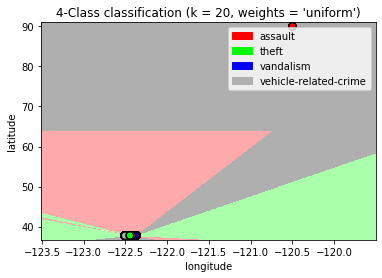

In [27]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches


X = second_encoded_sf_police_df[features_names]
y = second_encoded_sf_police_df['incident_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_crime_knn(X, y, n_neighbors, weights):
    X_mat = X[['longitude','latitude']].as_matrix()
    y_mat = y.as_matrix()
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", '#0000FF', '#AFAFAF'])
    
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat,y_mat)
    
    mesh_step_size = .01
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='assault')
    patch1 = mpatches.Patch(color='#00FF00', label='theft')
    patch2 = mpatches.Patch(color='#0000FF', label='vandalism')
    patch3 = mpatches.Patch(color='#AFAFAF', label='vehicle-related-crime')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()
    

plot_crime_knn(X_train,y_train, 20, 'uniform')

Getting score...
Getting score...


([<matplotlib.axis.XTick at 0x26d0e4788c8>,
 <a list of 11 Text xticklabel objects>)

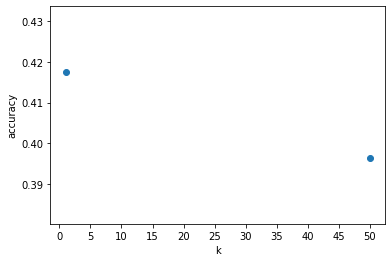

In [28]:
k_range = (1,50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    print("Getting score...")
    scores.append(knn.score(X_test_scaled, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40,45,50])

In [29]:
# LDA (Linear Discriminant Analysis)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
print(lda.score(X_train_scaled, y_train))
print(lda.score(X_test_scaled, y_test))

0.3608650507519554
0.3599497822672571


In [30]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print(gnb.score(X_train_scaled, y_train))
print(gnb.score(X_test_scaled, y_test))



0.3549747772324469
0.3529266537445304


In [ ]:
# Support Vector Machine 
# from sklearn.svm import SVC

# svm = SVC()
# svm.fit(X_train_scaled, y_train)
# print(svm.score(X_train_scaled,y_train))
# print(svm.score(X_test_scaled,y_test))
